# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.


## Define Project

To establish the context of the feasibility study, write a short introduction, mostly summarizing info that was in your proposal:

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression? 


## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [135]:
df = pd.read_csv('inspection_dataset.csv')
df.head() #displaying 5 rows

/tmp/ipykernel_539/403842423.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('inspection_dataset.csv')


,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,03/24/2025,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,5.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DA05TOC3V,IVPIBRNZY,2.0
1,#807 TUTTA BELLA,#807 TUTTA BELLA,11/18/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,0.0,Complete,False,NaN,NaN,0,PR0089260,DAMSSXL7H,NaN,2.0
2,#807 TUTTA BELLA,#807 TUTTA BELLA,08/02/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,15.0,Unsatisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, sa...",5,PR0089260,DAPY60A5G,IVNSPJXVQ,2.0
3,#807 TUTTA BELLA,#807 TUTTA BELLA,08/02/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,15.0,Unsatisfactory,False,RED,"0100 - PIC present, demonstrates knowledge and...",5,PR0089260,DAPY60A5G,IVY8UFUQW,2.0
4,#807 TUTTA BELLA,#807 TUTTA BELLA,08/02/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,15.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAPY60A5G,IVIIHZLLF,2.0


In [104]:
df.shape

(276510, 22)

In [105]:
df.duplicated().sum()


0

In [106]:
# checking for missing values
df_missing = df.isnull().sum()
df_missing

Name                               0
Program Identifier                 0
Inspection Date                  463
Description                        0
Address                            0
City                               0
Zip Code                           0
Phone                          71840
Longitude                        220
Latitude                         220
Inspection Business Name         463
Inspection Type                  463
Inspection Score                 498
Inspection Result                463
Inspection Closed Business       463
Violation Type                121880
Violation Description         121880
Violation Points                   0
Business_ID                        0
Inspection_Serial_Num            463
Violation_Record_ID           121880
Grade                          44658
dtype: int64

In [ ]:
#Has a lot of missing values, will replace them instead of deleting or else the data will be half the size

In [107]:
df.shape

(276510, 22)

In [108]:
summary = []
for col in df.columns.drop('outcome', errors='ignore'):
    n_uniques = df[col].nunique()
    # Determine type
    if df[col].dtype == 'object':
        ftype = 'Binary' if n_uniques == 2 else 'Categorical'
    else:
        ftype = 'Numerical'
    summary.append((col, n_uniques, ftype))

# Create summary dataframe
summary_df = pd.DataFrame(summary, columns=['feature', 'unique_count', 'type'])
summary_df


,feature,unique_count,type
0,Name,10193,Categorical
1,Program Identifier,11675,Categorical
2,Inspection Date,5706,Categorical
3,Description,34,Categorical
4,Address,10184,Categorical
5,City,108,Categorical
6,Zip Code,198,Categorical
7,Phone,7629,Categorical
8,Longitude,9768,Numerical
9,Latitude,9775,Numerical


In [109]:
outlier_counts = {}
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    outlier_counts[col] = len(outliers)
    
outlier_counts

{'Longitude': 7621,
 'Latitude': 2023,
 'Inspection Score': 16696,
 'Violation Points': 16817,
 'Grade': 359}

In [110]:
if 'Inspection Result' in df.columns:
    class_counts_result = df['Inspection Result'].value_counts(dropna=False)
    class_percentages_result = df['Inspection Result'].value_counts(normalize=True, dropna=False) * 100

    imbalance_result_df = pd.DataFrame({
        'Class': class_counts_result.index,
        'Count': class_counts_result.values,
        'Percentage': class_percentages_result.values.round(2)
    })
else:
    imbalance_result_df = pd.DataFrame({'Error': ['Inspection Result column not found']})

imbalance_result_df

,Class,Count,Percentage
0,Unsatisfactory,122611,44.34
1,Satisfactory,114187,41.30
2,Complete,38018,13.75
3,Incomplete,654,0.24
4,NaN,463,0.17
5,Not Accessible,196,0.07
6,Not Applicable,149,0.05
7,Not Ready For Inspection,115,0.04
8,Baseline Data,91,0.03
9,Not Confirmed,12,0.00


## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

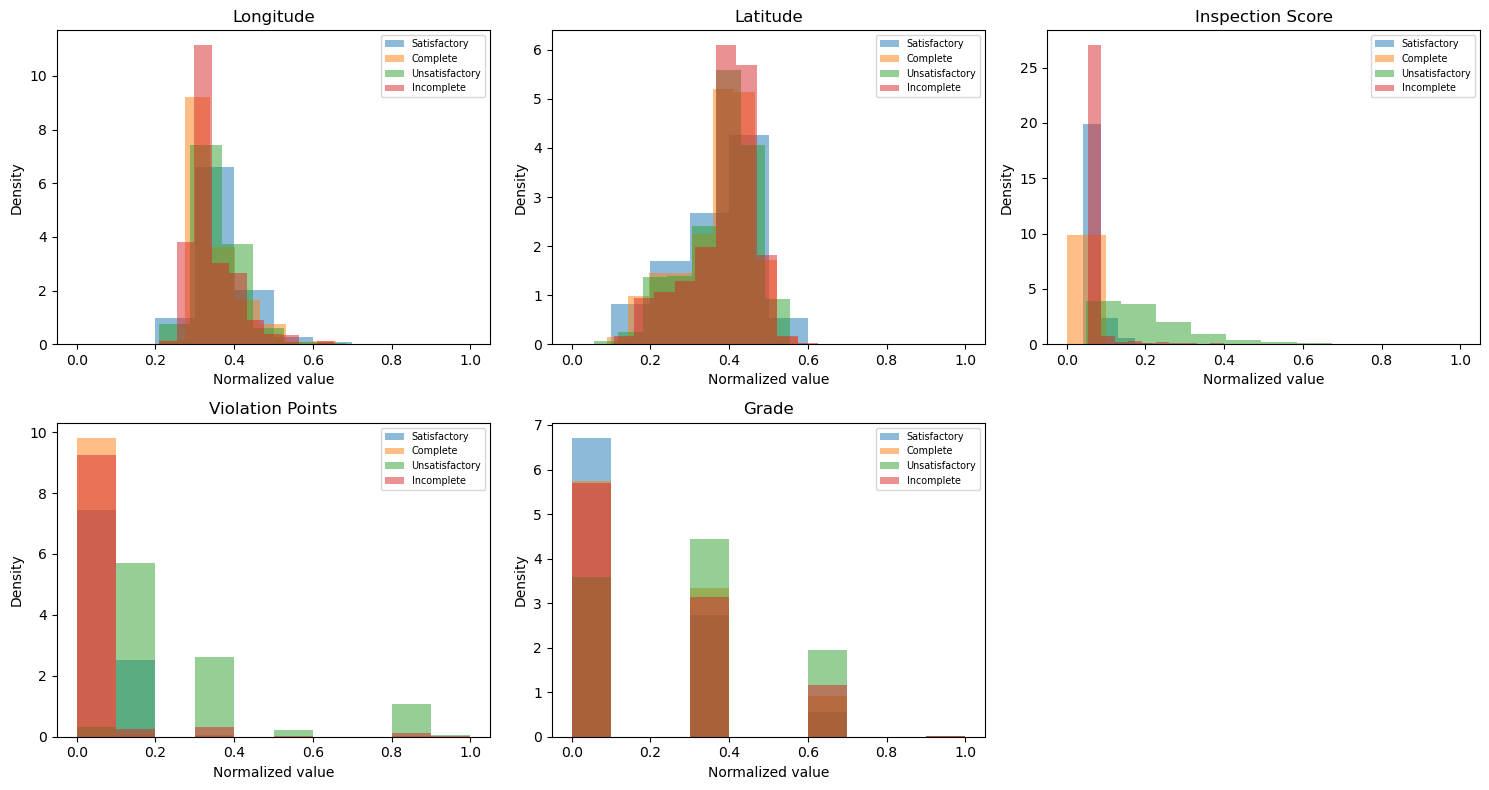

In [111]:
# Defining relevant classes for binary classification visualization
pass_classes = ['Satisfactory', 'Complete']
fail_classes = ['Unsatisfactory', 'Incomplete']
selected_classes = pass_classes + fail_classes

# Filtering the dataset to include only selected classes
df_filtered = df[df['Inspection Result'].isin(selected_classes)].dropna(subset=['Inspection Result'])

# Normalizing numerical features
features = [c for c in df_filtered.select_dtypes(include='number').columns]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_filtered[features])
scaled_df = pd.DataFrame(scaled, columns=features)
scaled_df['Inspection Result'] = df_filtered['Inspection Result'].values

n = len(features)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes_flat = axes.flatten()

for ax, feature in zip(axes_flat, features):
    for val in selected_classes:
        subset = scaled_df[scaled_df['Inspection Result'] == val][feature].dropna()
        ax.hist(subset, bins=10, density=True, alpha=0.5, label=val)
    ax.set_title(feature)
    ax.set_xlabel('Normalized value')
    ax.set_ylabel('Density')
    ax.legend(fontsize='x-small')

for unused_ax in axes_flat[len(features):]:
    unused_ax.axis('off')

plt.tight_layout()
plt.show()


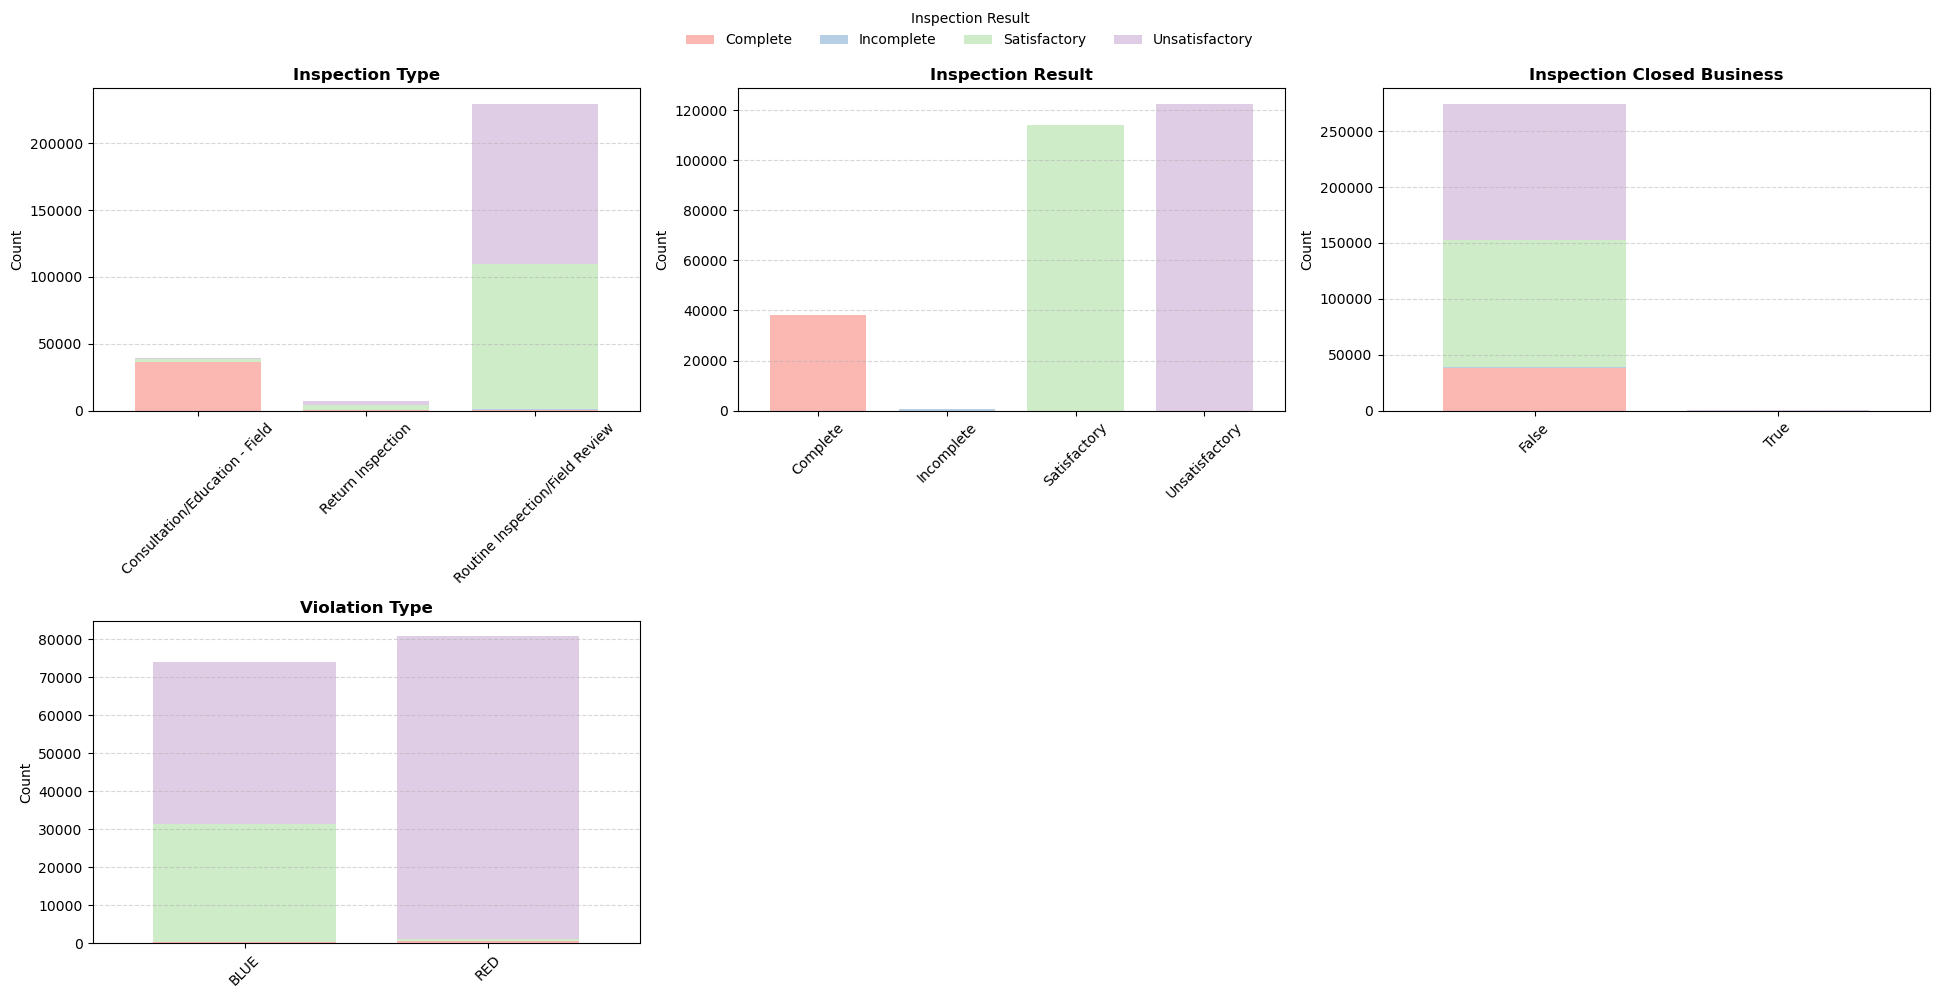

In [112]:
from matplotlib.cm import get_cmap

pastel_colors = get_cmap('Pastel1').colors

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5))
axes_flat = axes.flatten()

for ax, feature in zip(axes_flat, low_card_categoricals):
    counts = df_filtered.groupby(['Inspection Result', feature]).size().unstack(fill_value=0)
    counts.T.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.75,
        alpha=0.95,
        legend=False,
        color=pastel_colors[:len(counts.index)]
    )
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Inspection Result', loc='upper center', ncol=4, frameon=False, fontsize='medium')

for unused_ax in axes_flat[len(low_card_categoricals):]:
    unused_ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [56]:
#  categorizing features
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include='number').columns.tolist()


feature_categories = {
    "Categorical Features": categorical,
    "Numerical Features": numerical,
    "Identifier-like Features": [c for c in identifier_like if c in df_filtered.columns]
}

#  generating frequency tables for each categorical feature
categorical_freq_tables = {}
for feat in categorical:
    freq = pd.crosstab(df_filtered[feat], df_filtered['Inspection Result'])
    categorical_freq_tables[feat] = freq

(feature_categories, list(categorical_freq_tables.items())[:3])  # show categories and a few frequency tables


({'Categorical Features': ['Program Identifier',
   'Inspection Date',
   'Description',
   'City',
   'Zip Code',
   'Inspection Business Name',
   'Inspection Type',
   'Inspection Result',
   'Inspection Closed Business',
   'Violation Type',
   'Violation Description'],
  'Numerical Features': ['Longitude',
   'Latitude',
   'Inspection Score',
   'Violation Points',
   'Grade'],
  'Identifier-like Features': ['Business_ID',
   'Inspection_Serial_Num',
   'Violation_Record_ID',
   'Phone',
   'Address',
   'Name']},
 [('Program Identifier',
   Inspection Result                          Complete  Incomplete  Satisfactory  \
   Program Identifier                                                              
                                                     2           0             8   
   #807 TUTTA BELLA                                  1           0             4   
   +MAS CAFE                                         0           0             7   
   1 HOTEL SEATTLE           

## Data Cleaning and Preperation for Machine Learning

Based on what you find above, prepare the data for ML.

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [136]:
# Filing numerical columns with median ( not sure , might delete them instead still need to test it first)
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Filling categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [131]:
from sklearn.preprocessing import MinMaxScaler

#Identifying the numeric columns
numeric_features = df.select_dtypes(include='number').columns.tolist()


# SCALING : Applying MinMaxScaler
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

#  Confirming results
print(df[numeric_features].head())


   Longitude  Latitude  Inspection Score  Violation Points     Grade
0   0.342622  0.446029          0.079787          0.166667  0.333333
1   0.342622  0.446029          0.053191          0.000000  0.333333
2   0.342622  0.446029          0.132979          0.166667  0.333333
3   0.342622  0.446029          0.132979          0.166667  0.333333
4   0.342622  0.446029          0.132979          0.166667  0.333333


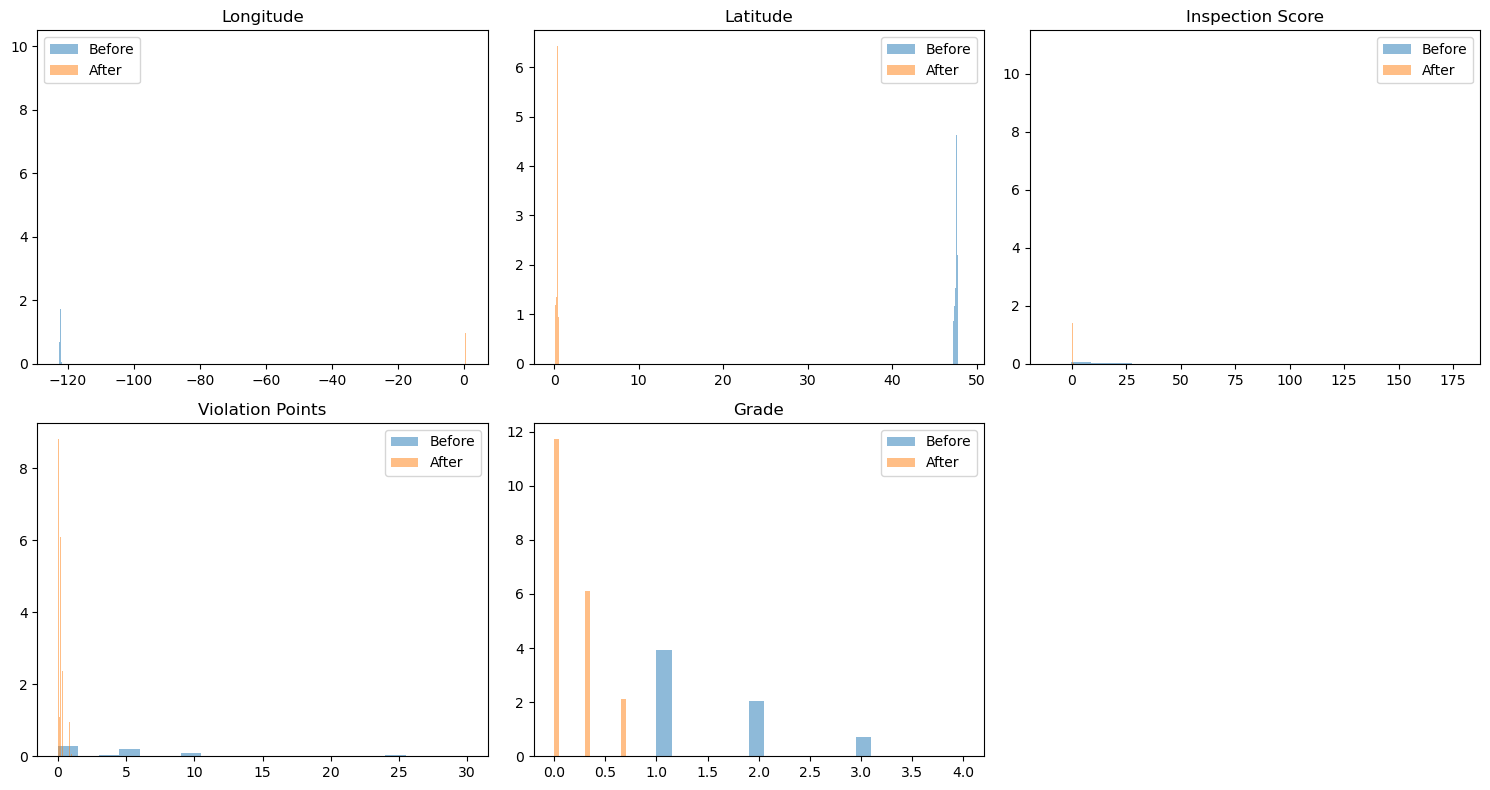

In [137]:
#  Visualizing before vs after
n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(original_data[col], bins=20, alpha=0.5, label='Before', density=True)
    axes[i].hist(df[col], bins=20, alpha=0.5, label='After', density=True)
    axes[i].set_title(col)
    axes[i].legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [138]:


# Filtering the target classes
valid_classes = ['Satisfactory', 'Complete', 'Unsatisfactory', 'Incomplete']
df = df[df['Inspection Result'].isin(valid_classes)].copy()

# Encode target (1 = Pass, 0 = Fail)
df['target'] = df['Inspection Result'].apply(lambda x: 1 if x in ['Satisfactory', 'Complete'] else 0)

# Dropping unnecessary columns
drop_cols = [
    'Inspection Result', 'Business_ID', 'Inspection_Serial_Num', 'Violation_Record_ID',
    'Phone', 'Address', 'Name', 'Inspection Business Name', 'Latitude', 'Longitude',
    'Program Identifier', 'Zip Code'
]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Replacing Inspection Date with Year and Month
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], errors='coerce')
df['Inspection Year'] = df['Inspection Date'].dt.year
df['Inspection Month'] = df['Inspection Date'].dt.month
df.drop(columns='Inspection Date', inplace=True)

# Grouping Violation Description into Top 10
top_violations = df['Violation Description'].value_counts().nlargest(10).index
df['Violation Description'] = df['Violation Description'].apply(
    lambda x: x if x in top_violations else 'Other'
)

# One-hot encoding selected categorical columns
onehot_cols = ['Grade', 'Inspection Type', 'Inspection Closed Business', 'Violation Type']
df[onehot_cols] = df[onehot_cols].fillna('Missing')  # Fill missing values before encoding
df = pd.get_dummies(df, columns=onehot_cols)


# Converting boolean columns to integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print(" Final shape after one-hot encoding:", df.shape)
df.head(3)


 Final shape after one-hot encoding: (275933, 19)


,Description,City,Inspection Score,Violation Description,Violation Points,target,Inspection Year,Inspection Month,Grade_0.0,Grade_0.3333333333333333,Grade_0.6666666666666667,Grade_1.0,Inspection Type_Consultation/Education - Field,Inspection Type_Return Inspection,Inspection Type_Routine Inspection/Field Review,Inspection Closed Business_False,Inspection Closed Business_True,Violation Type_BLUE,Violation Type_RED
0,Seating 0-12 - Risk Category III,SEATTLE,0.079787,2120 - Proper cold holding temperatures ( 42 d...,0.166667,0,2025,3,0,1,0,0,0,0,1,1,0,0,1
1,Seating 0-12 - Risk Category III,SEATTLE,0.053191,2110 - Proper cold holding temperatures (great...,0.000000,1,2024,11,0,1,0,0,1,0,0,1,0,0,1
2,Seating 0-12 - Risk Category III,SEATTLE,0.132979,"3400 - Wiping cloths properly used, stored, sa...",0.166667,0,2024,8,0,1,0,0,0,0,1,1,0,1,0
